<center><h1> Decision Tree Classifier from Scratch</h1></center>

## The Iris dataset will be used to demonstrate the working of the Algorithm

In [262]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [263]:
import matplotlib as mpl
mpl.style.use('ggplot')

In [264]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [265]:
# before we get started with the algorithm lets better understand our data

## Exploratory Data Analysis

In [266]:
# lets check for null values in our dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [267]:
# no null values so we dont have to worry about handling missing data for now

In [268]:
# lets look at the statistical information for our data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [269]:
 # the feature variables which we would consider for our decison tree will have to be numeric 
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [270]:
## Since this is a classification problem lets check the number of classes we have in our data and if it is balanced or not

In [271]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

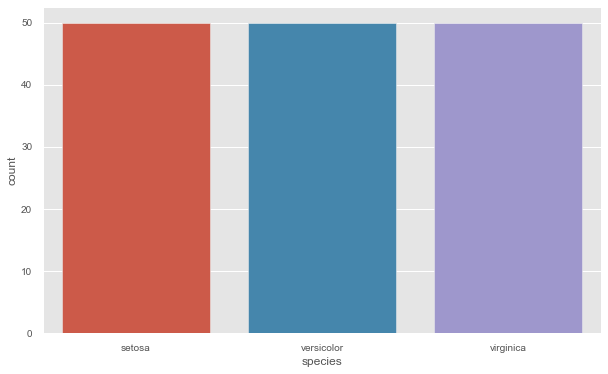

In [272]:
plt.figure(figsize=(10,6))
sns.countplot(df['species'])

In [273]:
## lets check the correleation of variables and see if they are linearly related or not

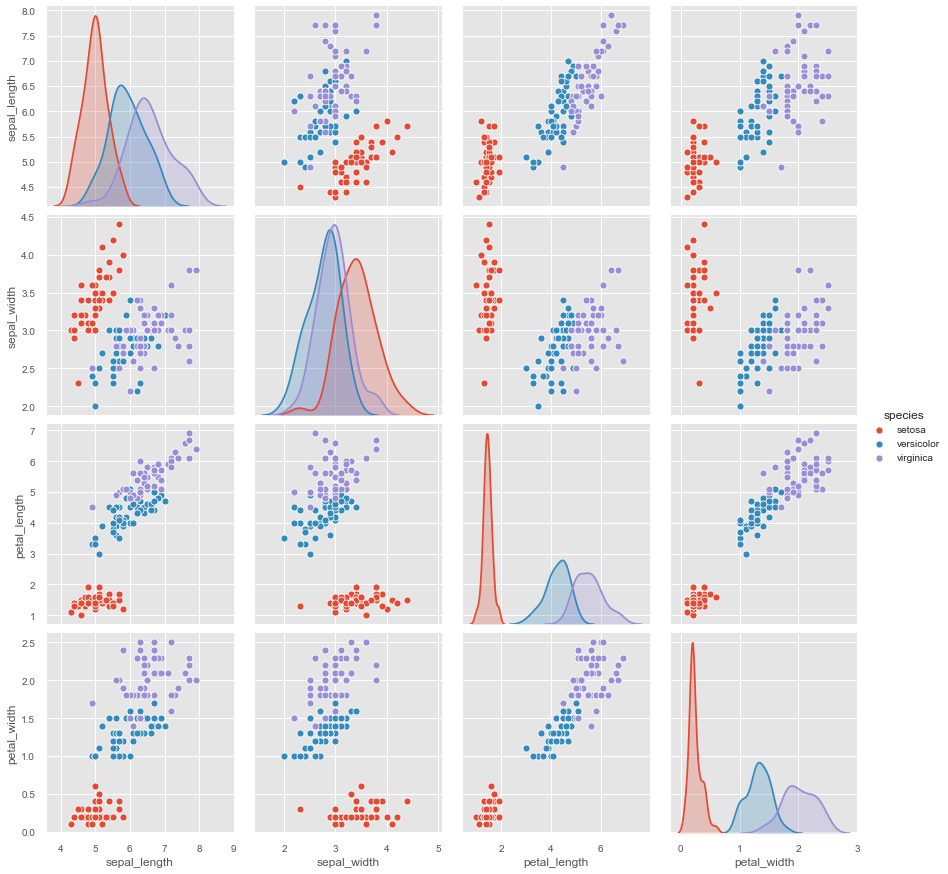

In [274]:
sns.pairplot(df,hue='species',height=3)

In [275]:
# the pair plot gives us the relationship between all the columns in the dataset and also the distribution of the data across
# the diagonal

In [276]:
# almost all the diagonal plots form a bell shaped curve indicating a normal distribution of the data for each species
# lets look at some of those relations more closely

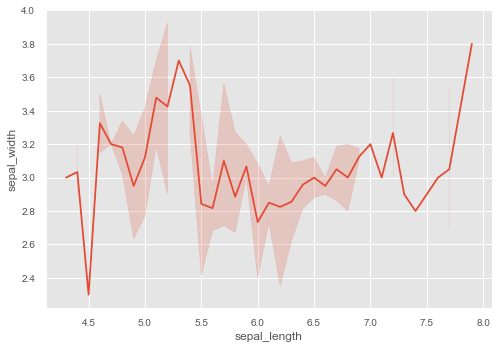

In [277]:
# sepal_length vs sepal_width
sns.lineplot(df['sepal_length'],df['sepal_width'])

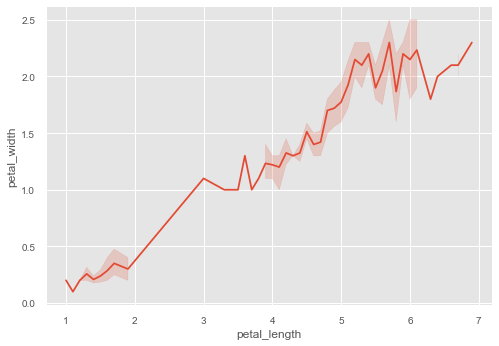

In [278]:
# petal_length vs petal_width is linearly related
sns.lineplot(df['petal_length'],df['petal_width'])

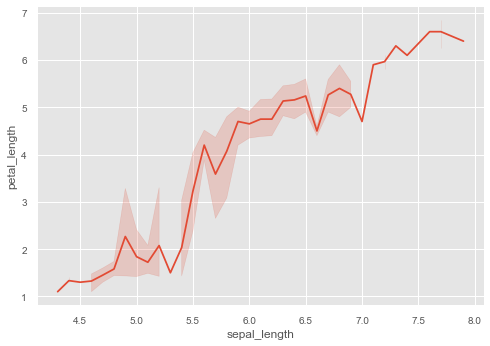

In [279]:
# sepal_length vs petal_length is also linearly related 
sns.lineplot(df['sepal_length'],df['petal_length'])

In [280]:
## lets also analyze the correlations of the columns in the dataset

In [281]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


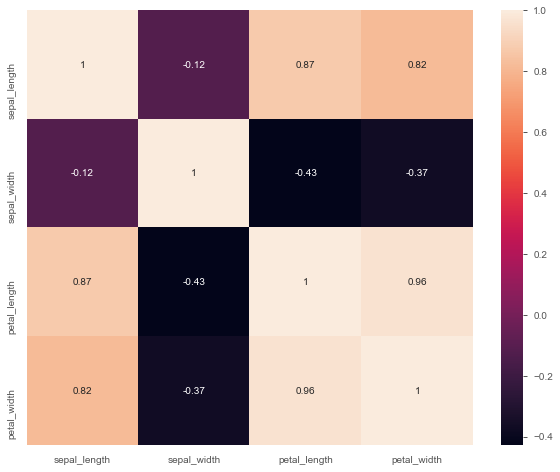

In [282]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,)

In [283]:
# On observing the relationships and correlations the most dependant variables are petal_length and petal_width with a 
# correlation value of 0.96

# Building the Decison Tree classifier

In [284]:
# the tree basically works by asking questions to partition the dataset. the data points satisfying the question are separated 
# as true or false nodes. Then Depending on how consistent or inconsistent the values at particular node is it may be further 
# partioned till the values are distributed to the appropriate classes

In [285]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [286]:
variables = list(df.columns)
variables

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [347]:
# This class just records a column number and a column value. The match method is used to 
# compare the feature value in an example to the feature value stored in the question
class Question:

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            variables[self.column], condition, str(self.value))

In [288]:
Question(1,4)

Is sepal_width <= 4?

In [289]:
Question(1,4).match(df.loc[0])

True

In [290]:
# lets pass in our dataframe as a feature matrix.
df.head().values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

In [291]:
#Partitions a dataset.
#For each row in the dataset, check if it matches the question. If so, add it to 'true rows', otherwise, add it to 'false rows'
def partition(rows, question):
    
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [292]:
# lets pass in a question for partion where sepal_width is > 3
true_rows, false_rows = partition(df.values, Question(1, 3))

In [293]:
print(f'Number of true rows :{len(true_rows)}')
print(f'Number of false rows :{len(false_rows)}')

Number of true rows :83
Number of false rows :67


In [294]:
# Next we have decide the order of quetions to be asked in the tree as it would greatly influnence the partition
# Here I'll be using the Gini Impurity and Information gain metrics to decide the question

In [295]:
def class_counts(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [296]:
# It calculates the impurity or entropy at a particular node of the tree
def gini(rows):

    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [297]:
df.loc[0:60]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [343]:
# here there is a little bit of mixing of labels in the data 
gini(df.loc[0:120].values)

0.628372378935865

In [299]:
# Calculating the information gain to decide which question will yield less impurity

In [300]:
from collections import Counter

In [301]:
# The uncertainty of the starting node, minus the weighted impurity of two child nodes.
def info_gain(left, right, current_uncertainty):

    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [344]:
current_uncertainty = gini(df.loc[0:120].values)
current_uncertainty

0.628372378935865

In [345]:
#1st test
# How much information do we gain by partioning on if sepal_width >= 3
true_rows, false_rows = partition(df.loc[0:120].values, Question(1, 3))
print("information gain",info_gain(true_rows, false_rows, current_uncertainty))
purity = Counter([row[-1]for row in true_rows])
print(purity)

information gain 0.16449080596338292
Counter({'versicolor': 42, 'virginica': 15, 'setosa': 8})


In [346]:
#2nd test
# How much information do we gain by partioning on if petal_length >= 2
true_rows, false_rows = partition(df.loc[0:120].values, Question(2, 2))
print("information gain",info_gain(true_rows, false_rows, current_uncertainty))
purity = Counter([row[-1]for row in true_rows])
print(purity)

information gain 0.38393052117774595
Counter({'setosa': 50})


In [305]:
# we gain much more information by partitioning on petal_length than speal_width at the root node 
# the reason for this is that the data has greater purity in the 2nd test than the first

In [306]:
# Findiing the best question to ask by iterating over every feature / value and calculating the information gain
def find_best_split(rows):

    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [356]:
best_gain, best_question = find_best_split(df.loc[0:100].values)
best_question

Is petal_width >= 1.0?

In [357]:
best_gain

0.4903402396151089

In [308]:
# Building the tree with the decision nodes and leaf nodes

In [309]:
# A Leaf node classifies data
class Leaf:

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [310]:
# A Decision Node asks a question.
class Decision_Node:

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [311]:
def build_tree(rows):

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [312]:
def print_tree(node, spacing=""):

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [313]:
# Train test spilt 

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, df['species'].values, test_size=0.2)

In [316]:
y_train = np.expand_dims(y_train,axis=1)
y_train.shape

(120, 1)

In [317]:
train_data = np.concatenate((X_train,y_train),axis=1)
train_data

array([[5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [6.7, 3.1, 4.7, 1.5, 'versicolor'],
       [6.0, 2.2, 4.0, 1.0, 'versicolor'],
       [5.8, 2.7, 3.9, 1.2, 'versicolor'],
       [6.2, 2.2, 4.5, 1.5, 'versicolor'],
       [7.7, 2.8, 6.7, 2.0, 'virginica'],
       [7.7, 3.0, 6.1, 2.3, 'virginica'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.9, 3.2, 4.8, 1.8, 'versicolor'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [5.4, 3.0, 4.5, 1.5, 'versicolor'],
       [6.5, 3.2, 5.1, 2.0, 'virginica'],
       [5.1, 2.5, 3.0, 1.1, 'versicolor'],
       [5.6, 2.7, 4.2, 1.3, 'versicolor'],
       [6.3, 2.5, 5.0, 1.9, 'virginica'],
       [6.4, 2.9, 4.3, 1.3, 'versicolor'],
       [4.5, 2.3, 1.3, 0.3, 'setosa'],
       [5.9, 3.0, 4.2, 1.5, 'versicolor'],
       [4.9, 2.5, 4.5, 1.7, 'virginica'],
       [6.4, 3.2, 5.3, 2.3, 'virginica'],
       [5.7, 2.8, 4.5, 1.3, 'versicolor'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.8, 1.9, 0.4, 'setosa'],
  

In [318]:
# lets create the testing data as well
y_test = np.expand_dims(y_test,axis=1)
testing_data = np.concatenate((X_test,y_test),axis=1)

In [349]:
# Training the tree to 80% of the data and keeping 20 % for testing
my_tree = build_tree(train_data)

In [350]:
# Our tree can be visualized with true and false branches and once it reaches the leaf node it returns the prediction values stored
print_tree(my_tree)

Is petal_width >= 1.0?
--> True:
  Is petal_width >= 1.8?
  --> True:
    Is petal_length >= 4.9?
    --> True:
      Predict {'virginica': 34}
    --> False:
      Is sepal_width >= 3.2?
      --> True:
        Predict {'versicolor': 1}
      --> False:
        Predict {'virginica': 2}
  --> False:
    Is petal_length >= 5.0?
    --> True:
      Is petal_width >= 1.6?
      --> True:
        Predict {'versicolor': 2}
      --> False:
        Predict {'virginica': 3}
    --> False:
      Is petal_width >= 1.7?
      --> True:
        Predict {'virginica': 1}
      --> False:
        Predict {'versicolor': 39}
--> False:
  Predict {'setosa': 38}


In [321]:
### prediction function

def classify(row, node):

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [322]:
df.loc[122].values

array([7.7, 2.8, 6.7, 2.0, 'virginica'], dtype=object)

In [323]:
classify(df.loc[122].values[:4],my_tree)

{'virginica': 34}

In [324]:
# A nicer way to print the predictions at a leaf.
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [325]:
print_leaf(classify(df.loc[130].values[:4],my_tree))

{'virginica': '100%'}

## Testing our decision tree

In [326]:
from sklearn.metrics import classification_report,confusion_matrix

In [327]:
testing_data

array([[4.4, 3.0, 1.3, 0.2, 'setosa'],
       [6.7, 3.1, 5.6, 2.4, 'virginica'],
       [6.9, 3.1, 5.4, 2.1, 'virginica'],
       [6.5, 2.8, 4.6, 1.5, 'versicolor'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [6.1, 3.0, 4.6, 1.4, 'versicolor'],
       [5.9, 3.0, 5.1, 1.8, 'virginica'],
       [5.1, 3.4, 1.5, 0.2, 'setosa'],
       [6.7, 2.5, 5.8, 1.8, 'virginica'],
       [7.3, 2.9, 6.3, 1.8, 'virginica'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.7, 2.5, 5.0, 2.0, 'virginica'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [6.7, 3.0, 5.2, 2.3, 'virginica'],
       [4.8, 3.0, 1.4, 0.3, 'setosa'],
       [5.5, 2.3, 4.0, 1.3, 'versicolor'],
       [6.5, 3.0, 5.8, 2.2, 'virginica'],
       [5.5, 2.4, 3.8, 1.1, 'versicolor'],
       [5.7, 2.6, 3.5, 1.0, 'versicolor'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [5.6, 2.9, 3.6, 1.3, 'versicolor'],
       [5.0, 3.4, 1.6, 0.4, 'setosa'],
       [7.2, 3.0

In [351]:
y_pred = []
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row[0:4], my_tree))))
    y_pred.append(print_leaf(classify(row, my_tree)))

Actual: setosa. Predicted: {'setosa': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: versicolor. Predicted: {'versicolor': '100%'}
Actual: setosa. Predicted: {'setosa': '100%'}
Actual: versicolor. Predicted: {'versicolor': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: setosa. Predicted: {'setosa': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: setosa. Predicted: {'setosa': '100%'}
Actual: setosa. Predicted: {'setosa': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: setosa. Predicted: {'setosa': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: setosa. Predicted: {'setosa': '100%'}
Actual: versicolor. Predicted: {'versicolor': '100%'}
Actual: virginica. Predicted: {'virginica': '100%'}
Actual: versicolor. Predicted: {'versicolor': '100%'}
Actual: versicolor. Predicted: {'versicolor': 

In [352]:
y_pred = [list(pred.keys())[0] for pred in y_pred]
y_pred

['setosa',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica']

In [353]:
# Based on the testing results our Decision tree model has and accuracy of 97%
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [354]:
# the confusion matrix shows the classes that were misclassified.
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


## Comparing the Scratch model to sk-learn model

In [333]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree

In [334]:
sk_tree = DecisionTreeClassifier()

In [335]:
sk_tree.fit(X_train,y_train)
y_pred2 = sk_tree.predict(X_test)

In [336]:
df.columns[0:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

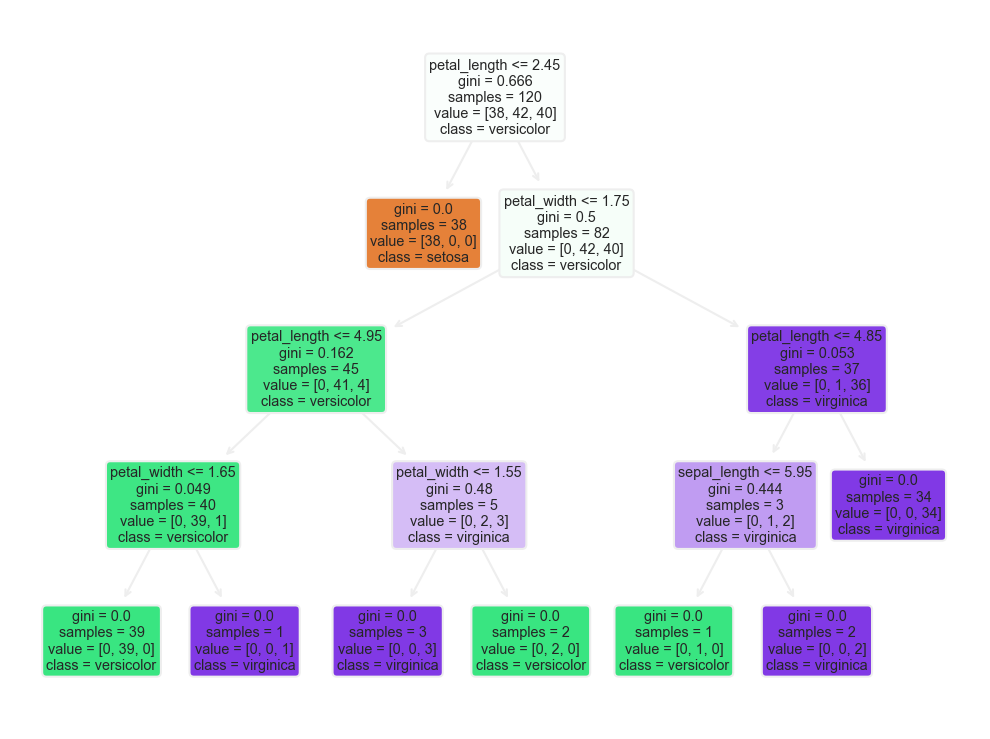

In [359]:
# visualizing the sk-tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)
tree.plot_tree(sk_tree,feature_names=df.columns[0:4],class_names=['setosa','versicolor','virginica'],filled=True,rounded=True)
fig.savefig('sk-tree.png')

In [338]:
# comparing sk-tree and scratch tree

In [355]:
# Report for Scratch Decision tree
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [340]:
# Report for Sk-learn Decision tree
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# As we can see above, our Scratch model has almost identical performance to the sk-learn model 
# except for the difference of the questions being asked at the nodes.